# Ahora vamos resolver ecuaciones diferenciales computacionalmente

Existen varios métodos, uno de ellos, el método de Euler utiliza la siguiente aproximación:

$f(x+h)=f(x)+hf'(x)=f(x)+h\frac{f(x+h)-f(x)}{h}\\ $

Y para determinar quien es $f'$ suponemos que: $\ \ f'(x)=g(x,f(x))$ 

Tampoco sabemos quien es $f$, pero sabemos cuánto vale $f$ en el valor $x_0$,    
es decir: $f(x_0)=f_0+hf'_0=f_0+g(x_0,f_0)$

Por lo tanto, vamos a decir que cada valor que toma la función $f$ es de la forma:

$f(x_{i+1}=f(x_i)+g(x_i,f_i)h$

In [128]:
#NOTA: es útil empezar a definir una función especificando que es
#lo que quiero que me regrese dicha función, en éste caso voy a 
#esperar un arreglo como resultado, entonces lo primero es importar numpy.

In [129]:
from numpy import*
from pylab import*
%matplotlib inline 

In [130]:
#nota que p_ini es un vector con todos las condiciones iniciales (t0, f0, f1, ...) 
#no un escalar, esto sera util para cuando queramos funciones vectoriales mas pro.

def euler(funcion, p_ini, t_final, h=0.01):
    
    #Vamos a crear un vector con la particion de "nuestros argumentos"
    tiempos = arange(p_ini[0],t_final+h,h)
    #arrange esta creando un vector con valores desde la primer coordenada del vector p_ini 
    #hasta t_final con distancias h.
    
    #Aunque el valor inicial de y es arbitrario, es importante definirlo y que este valor 
    #corresponda con el tipo de respuesta que estamos esperando, ie si el resultado es 
    #matriz, tiene que ser matriz.
    
    y=[0]*len(tiempos) #zeros(len(tiempos))
    #la funcion len nos dice el num de entradas de mi vector
    #el cambio que hicimos es para que podamos usar muchas variables.
    
    #Estamos redefiniendo el valor de la primera entrada de y como la 2da entrada de p_ini
    y[0]=p_ini[1]
    for i in range(len(tiempos)-1):
        y[i+1]=y[i]+funcion(y[i], tiempos[i])*h
    resultado=[tiempos, y]
    return resultado

In [131]:
#Ahora vamos a definir una ecuacion para probar nuestro integrador!!!
def ec_1(y,t):
    return y

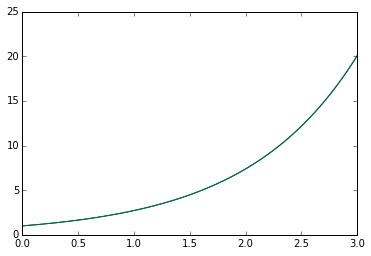

In [132]:
#Probando que funcione:
respuesta=euler(ec_1,[0,1],3.,.001)

#Queremos a graficar la solucion, la primera coordenada es el tiempo
#la segunda coordenada es la funcion evaluada.
plot(respuesta[0],respuesta[1])
#y tambien graficaremos la solucion analitica.
plot(respuesta[0],exp(respuesta[0]))
show()

In [133]:
def ec_2(y,x):
    return -y*x

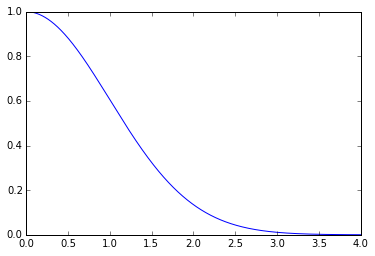

In [134]:
sol_2=euler(ec_2, [0,1], 4., .0001)
plot(sol_2[0],sol_2[1])
show()

Es tedioso tener que escribir siempre que grafiquen para ver mi solucion... 
hay que definir otra funcion!

In [135]:
def ploteo(sol):
    plot(sol[0],sol[1])
show()

In [136]:
def ec_3(y,x):
    return (1./(sin(x)+2))*(((2.*y)/sqrt(3))**2-1)

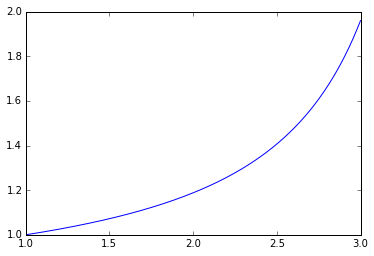

In [137]:
res=euler(ec_3, [1,1], 3., .001)
ploteo(res)

Vamos a usar la ec3 con distintas condiciones:

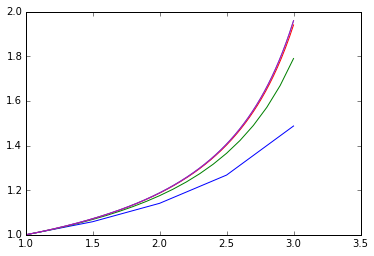

In [138]:
h=[0.5,0.1,0.01,0.001, 1e-3]
for s in h:
    sol = euler(ec_3, [1,1], 3., s)
    ploteo(sol)

Ahora vamos a resolver la ecuacion de un pendulo. Ésta ecuacion es de segundo orden, si embargo, la podemos escribir desacoplada y usar el mismo metodo de Euler:
$y''+y=0$, donde $y'(0)=1$

Renombrando $y'=v$, obtenemos un sistema de ecuaciones:
$y'=v$
$v'=-y$

NOTA: si mi ecuacion no esta desacoplada no podemos usar euler

In [139]:
def ec_5(y,t):
    return array([y[1],-y[0]])

los datos que quiero


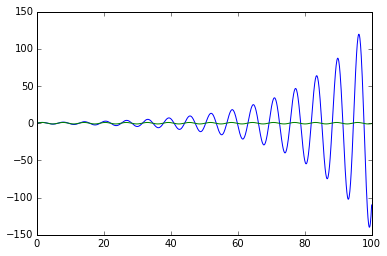

In [147]:
sol = euler(ec_5,[0,array([0,1])],100, .1)
#print sol[1]
y=zeros(len(sol[0]))
v=zeros(len(sol[0]))
print "Los datos que quiero"
for i in range(len(sol[1])):
    y[i]= sol[1][i][0]
    v[i]= sol[1][i][1]
plot(sol[0],y)
plot(sol[0],sin(sol[0]))

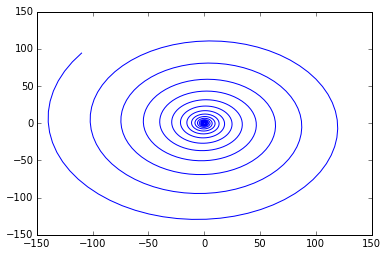

In [148]:
plot(y,v)